## 统计方法实验5

10211900416 郭夏辉

本次实验中，采用人造数据的方式构建不同类型的点集。每个点集均是一个二维数据集$\{(x_{i,1},x_{i,2}),i=1,2,\cdots,n\}$。本次实验的目的是让同学们形象地理解不同的聚类方法在不同类型的数据集上的表现是不同的，而且能够掌握如何构造人工数据集，并以此可以用于聚类方法的比较。

参考资料：https://scikit-learn.org/stable/modules/clustering.html#clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy.linalg import eig

# Cluster Method
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

In [2]:
# ============
# Generate datasets
# ============
np.random.seed(416)
n_samples = 1500 # sample size

# ============
# Definitions of Fuctions
# ============
def mat_sqrt(Mat):
    eig_value,eig_vec = eig(Mat)
    return(eig_vec.dot(np.diag(np.sqrt(eig_value)).dot(eig_vec.T)))

1. 阅读人工数据集的构造方法，并自行提供一种与所提供的五种不同的人工数据集。

我先来具体看一下提供了的那五种不同的人工数据集，再自行提供一种额外的人工数据集。

1.1 Equal Variance and Equal Size

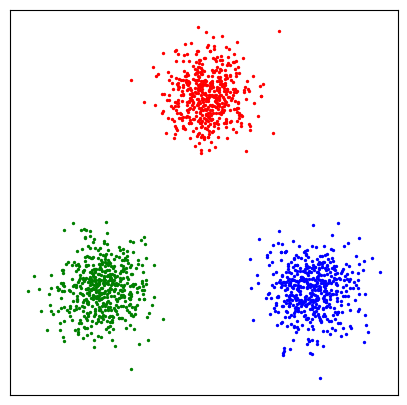

In [3]:
K = 3
n_subset = int(n_samples/K)
z1 = np.random.normal(loc = 0, scale = 0.3,size = (n_subset,2))
z2 = np.random.normal(loc = 0, scale = 0.3,size = (n_subset,2))
z3 = np.random.normal(loc = 0, scale = 0.3,size = (n_subset,2))

mu1 = np.array([0,1])
mu2 = np.array([-math.sqrt(2),-math.sqrt(2)])
mu3 = np.array([math.sqrt(2),-math.sqrt(2)])

x11 = z1 + mu1
x12 = z2 + mu2
x13 = z3 + mu3
dataset1 = np.r_[x11,x12,x13]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x11[:,0],x11[:,1],color="red",s = 2)
plt.scatter(x12[:,0],x12[:,1],color="green",s = 2)
plt.scatter(x13[:,0],x13[:,1],color="blue",s = 2)

1.2 High-Covariance Case

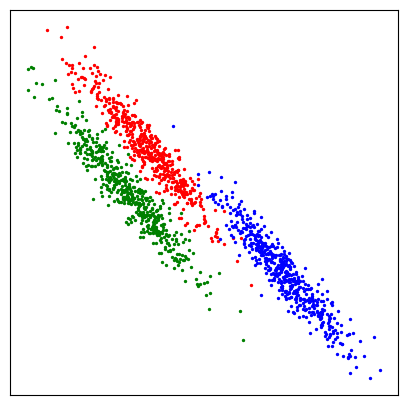

In [4]:
K = 3
n_subset = int(n_samples/K)
z1 = np.random.normal(loc = 0, scale = 1,size = (n_subset,2))
z2 = np.random.normal(loc = 0, scale = 1,size = (n_subset,2))
z3 = np.random.normal(loc = 0, scale = 1,size = (n_subset,2))

mu1 = np.array([-0.7,1])
rho1 = -0.95
mu2 = np.array([-1,0.5])
mu3 = np.array([1.25,-0.5])
Sigma = np.array([[1,rho1],[rho1,1]])
sigma1 = 0.5

x21 =  z1.dot(mat_sqrt(Sigma)*sigma1) + mu1
x22 = z2.dot(mat_sqrt(Sigma)*sigma1) + mu2
x23 = z3.dot(mat_sqrt(Sigma)*sigma1) + mu3
dataset2 = np.r_[x21,x22,x23]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x21[:,0],x21[:,1],color="red",s = 2)
plt.scatter(x22[:,0],x22[:,1],color="green",s = 2)
plt.scatter(x23[:,0],x23[:,1],color="blue",s = 2)

1.3 Unequal variance and Unequal size

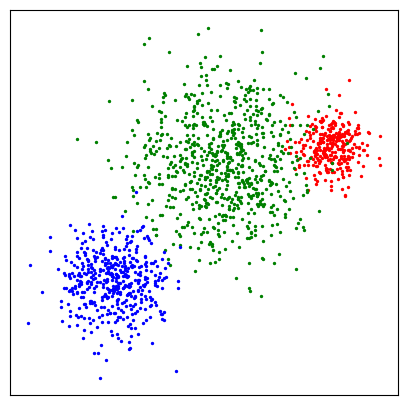

In [5]:
mu1 = np.array([1.5,0.5])
mu2 = np.array([0.2,0.3])
mu3 = np.array([-1,-1])
sigma = 0.1
sigma1 = 2*sigma
sigma2 = 5*sigma
sigma3 = 3*sigma
n_subset1 = int(sigma1/(sigma1+sigma2+sigma3)*n_samples)
n_subset2 = int(sigma2/(sigma1+sigma2+sigma3)*n_samples)
n_subset3 = int(sigma3/(sigma1+sigma2+sigma3)*n_samples)

x31 = np.random.normal(loc = 0, scale = sigma1,size = (n_subset1,2)) + mu1
x32 = np.random.normal(loc = 0, scale = sigma2,size = (n_subset2,2)) + mu2
x33 = np.random.normal(loc = 0, scale = sigma3,size = (n_subset3,2)) + mu3

dataset3 = np.r_[x31,x32,x33]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x31[:,0],x31[:,1],color="red",s = 2)
plt.scatter(x32[:,0],x32[:,1],color="green",s = 2)
plt.scatter(x33[:,0],x33[:,1],color="blue",s = 2)

1.4 Ring Plot

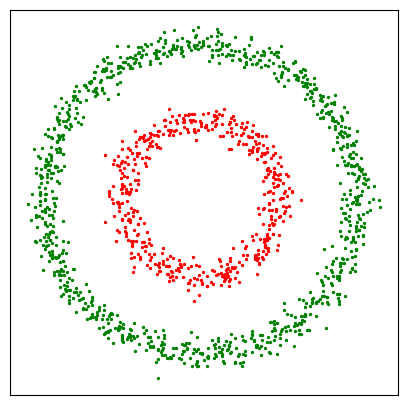

In [6]:
r1 = 1
r2 = 2

K = r1+r2
n_subset1 = int(n_samples/K)
n_subset2 = int(n_samples/K*(K-1))
theta1 = np.linspace(1,360,n_subset1)/360*2*math.pi
theta2 = np.linspace(1,360,n_subset2)/360*2*math.pi
z1 = np.random.normal(loc = 0, scale = 0.1,size = (n_subset1,2))
z2 = np.random.normal(loc = 0, scale = 0.1,size = (n_subset2,2))

x41 = np.transpose(np.array([[r1 * math.cos(theta1[i]) for i in range(len(theta1))],
               [r1 * math.sin(theta1[i]) for i in range(len(theta1))]])) + z1
x42 = np.transpose(np.array([[r2 * math.cos(theta2[i]) for i in range(len(theta2))],
               [r2 * math.sin(theta2[i]) for i in range(len(theta2))]])) + z2
dataset4 = np.r_[x41,x42]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x41[:,0],x41[:,1],color="red",s = 2)
plt.scatter(x42[:,0],x42[:,1],color="green",s = 2)

1.5 Wave Plot

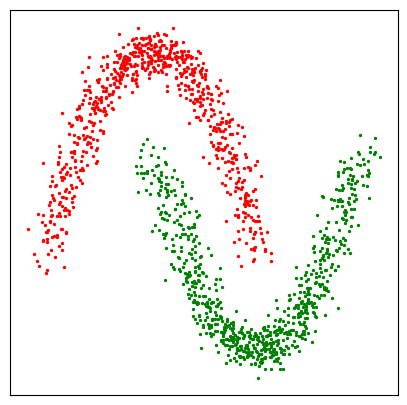

In [7]:
a = 1/(-1.2+0.5)**2
n_subset=int(n_samples/2)

x = np.linspace(-1.5,0.5,n_subset)
y1 = (-a)*(x+0.5)**2 + 1.5
y2 = (a)*(-x -0.5)**2 - 1.5
z1 = np.random.normal(loc = 0, scale = 0.1,size = (n_subset,2))
z2 = np.random.normal(loc = 0, scale = 0.1,size = (n_subset,2))

x51 = np.c_[x,y1] + z1
x52 = np.c_[-x,y2] + z2
dataset5 = np.r_[x51,x52]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x51[:,0],x51[:,1],color="red",s = 2)
plt.scatter(x52[:,0],x52[:,1],color="green",s = 2)

1.6 我构造的人工数据集

基于简单的均匀分布，我构建的数据集均匀地洒落在空间中，并将整个平面划分为了四块。为了展示方便，我先将它们染成了不同的颜色。

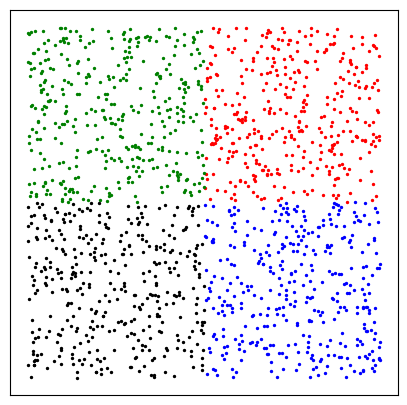

In [8]:
K = 4
n_subset = int(n_samples / K)
z1 = np.random.uniform(0, 1,size = (n_subset, 2))
z2 = np.random.uniform(0, 1,size = (n_subset, 2))
z3 = np.random.uniform(0, 1,size = (n_subset, 2))
z4 = np.random.uniform(0, 1,size = (n_subset, 2))

mu1 = np.array([0, 0])
mu2 = np.array([-1, 0])
mu3 = np.array([0, -1])
mu4 = np.array([-1, -1])

x61 = z1 + mu1
x62 = z2 + mu2
x63 = z3 + mu3
x64 = z4 + mu4
dataset6 = np.r_[x61, x62, x63, x64]
fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x61[:,0],x61[:,1],color="red",s = 2)
plt.scatter(x62[:,0],x62[:,1],color="green",s = 2)
plt.scatter(x63[:,0],x63[:,1],color="blue",s = 2)
plt.scatter(x64[:,0],x64[:,1],color="black",s = 2)

2. 采用不同的聚类方式（包括：自下而上的层次聚类、Kmeans、GMM、DBSCAN），分别在六个数据集上进行聚类。

3. 请用绘图的方式展示不同聚类方式的结果。

问题2和问题3我为了方便一起来做了，其实就是先聚类再展示。在基本完成实验之后，我才发觉自己更应该写一个函数把相似的操作包装起来，有点遗憾这次实验没这样做了。

数据集1

c:\learnAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\learnAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\learnAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\learnAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_

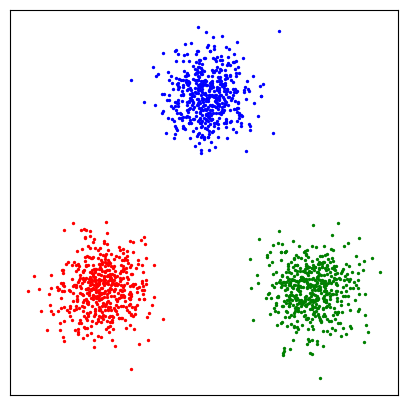

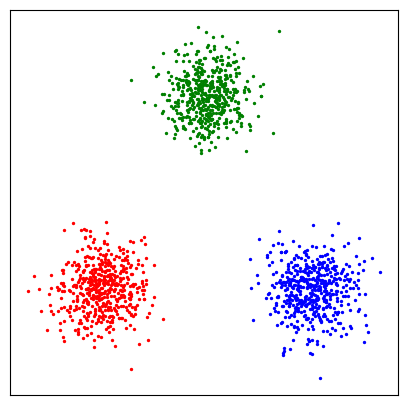

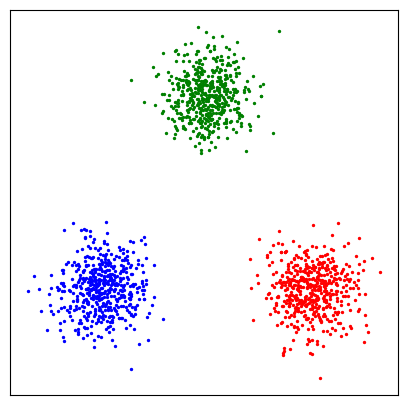

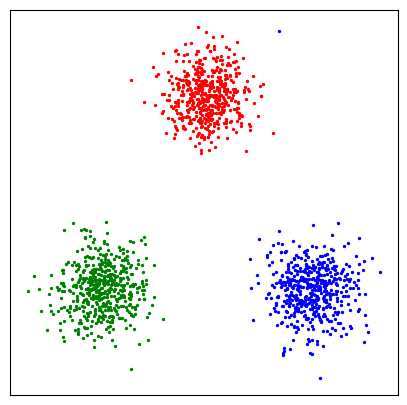

In [9]:
# dataset1
######
model11 = AgglomerativeClustering(n_clusters=3).fit(dataset1)
labels11 = model11.fit_predict(dataset1)
y111 = np.empty((0, 2))
y112 = np.empty((0, 2))
y113 = np.empty((0, 2))
for i in range(n_samples):
    if labels11[i] == 0:
        y111 = np.r_[y111, dataset1[i].reshape((1, 2))]
    elif labels11[i] == 1:
        y112 = np.r_[y112, dataset1[i].reshape((1, 2))]
    else:
        y113 = np.r_[y113, dataset1[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(y111[:,0],y111[:,1],color="red",s = 2)
plt.scatter(y112[:,0],y112[:,1],color="green",s = 2)
plt.scatter(y113[:,0],y113[:,1],color="blue",s = 2)
######
model12 = KMeans(n_clusters=3).fit(dataset1)
labels12 = model12.fit_predict(dataset1)
y121 = np.empty((0, 2))
y122 = np.empty((0, 2))
y123 = np.empty((0, 2))
for i in range(n_samples):
    if labels12[i] == 0:
        y121 = np.r_[y121, dataset1[i].reshape((1, 2))]
    elif labels12[i] == 1:
        y122 = np.r_[y122, dataset1[i].reshape((1, 2))]
    else:
        y123 = np.r_[y123, dataset1[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(y121[:,0],y121[:,1],color="red",s = 2)
plt.scatter(y122[:,0],y122[:,1],color="green",s = 2)
plt.scatter(y123[:,0],y123[:,1],color="blue",s = 2)
######
model13 = GaussianMixture(n_components=3).fit(dataset1)
labels13 = model13.fit_predict(dataset1)
y131 = np.empty((0, 2))
y132 = np.empty((0, 2))
y133 = np.empty((0, 2))
for i in range(n_samples):
    if labels13[i] == 0:
        y131 = np.r_[y131, dataset1[i].reshape((1, 2))]
    elif labels13[i] == 1:
        y132 = np.r_[y132, dataset1[i].reshape((1, 2))]
    else:
        y133 = np.r_[y133, dataset1[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(y131[:,0],y131[:,1],color="red",s = 2)
plt.scatter(y132[:,0],y132[:,1],color="green",s = 2)
plt.scatter(y133[:,0],y133[:,1],color="blue",s = 2)
######
model14 = DBSCAN(min_samples=50).fit(dataset1)
labels14 = model14.fit_predict(dataset1)
y141 = np.empty((0, 2))
y142 = np.empty((0, 2))
y143 = np.empty((0, 2))
for i in range(n_samples):
    if labels14[i] == 0:
        y141 = np.r_[y141, dataset1[i].reshape((1, 2))]
    elif labels14[i] == 1:
        y142 = np.r_[y142, dataset1[i].reshape((1, 2))]
    else:
        y143 = np.r_[y143, dataset1[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(y141[:,0],y141[:,1],color="red",s = 2)
plt.scatter(y142[:,0],y142[:,1],color="green",s = 2)
plt.scatter(y143[:,0],y143[:,1],color="blue",s = 2)

数据集2

c:\learnAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\learnAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\learnAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\learnAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_

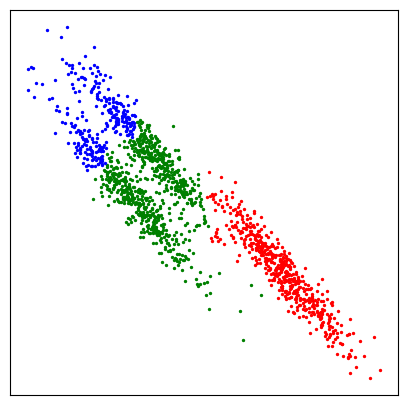

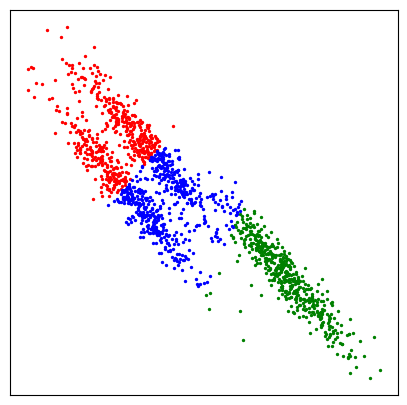

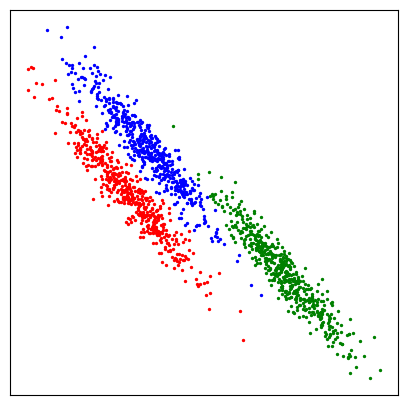

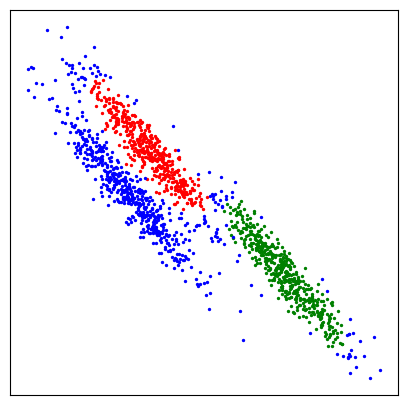

In [10]:
# dataset2 
######
model21 = AgglomerativeClustering(n_clusters=3,linkage='ward').fit(dataset2)
labels21 = model21.fit_predict(dataset2)
y211 = np.empty((0, 2))
y212 = np.empty((0, 2))
y213 = np.empty((0, 2))
for i in range(n_samples):
    if labels21[i] == 0:
        y211 = np.r_[y211, dataset2[i].reshape((1, 2))]
    elif labels21[i] == 1:
        y212 = np.r_[y212, dataset2[i].reshape((1, 2))]
    else:
        y213 = np.r_[y213, dataset2[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(y211[:,0],y211[:,1],color="red",s = 2)
plt.scatter(y212[:,0],y212[:,1],color="green",s = 2)
plt.scatter(y213[:,0],y213[:,1],color="blue",s = 2)
######
model22 = KMeans(n_clusters=3,max_iter=400,init='k-means++').fit(dataset2)
labels22 = model22.fit_predict(dataset2)
y221 = np.empty((0, 2))
y222 = np.empty((0, 2))
y223 = np.empty((0, 2))
for i in range(n_samples):
    if labels22[i] == 0:
        y221 = np.r_[y221, dataset2[i].reshape((1, 2))]
    elif labels22[i] == 1:
        y222 = np.r_[y222, dataset2[i].reshape((1, 2))]
    else:
        y223 = np.r_[y223, dataset2[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(y221[:,0],y221[:,1],color="red",s = 2)
plt.scatter(y222[:,0],y222[:,1],color="green",s = 2)
plt.scatter(y223[:,0],y223[:,1],color="blue",s = 2)
######
model23 = GaussianMixture(n_components=3,covariance_type='tied',tol=1e-5,max_iter=50).fit(dataset2)
labels23 = model23.fit_predict(dataset2)
y231 = np.empty((0, 2))
y232 = np.empty((0, 2))
y233 = np.empty((0, 2))
for i in range(n_samples):
    if labels23[i] == 0:
        y231 = np.r_[y231, dataset2[i].reshape((1, 2))]
    elif labels23[i] == 1:
        y232 = np.r_[y232, dataset2[i].reshape((1, 2))]
    else:
        y233 = np.r_[y233, dataset2[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(y231[:,0],y231[:,1],color="red",s = 2)
plt.scatter(y232[:,0],y232[:,1],color="green",s = 2)
plt.scatter(y233[:,0],y233[:,1],color="blue",s = 2)
######
model24 = DBSCAN(eps=0.12,min_samples=12).fit(dataset2)
labels24 = model24.fit_predict(dataset2)
y241 = np.empty((0, 2))
y242 = np.empty((0, 2))
y243 = np.empty((0, 2))
for i in range(n_samples):
    if labels24[i] == 0:
        y241 = np.r_[y241, dataset2[i].reshape((1, 2))]
    elif labels24[i] == 1:
        y242 = np.r_[y242, dataset2[i].reshape((1, 2))]
    else:
        y243 = np.r_[y243, dataset2[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(y241[:,0],y241[:,1],color="red",s = 2)
plt.scatter(y242[:,0],y242[:,1],color="green",s = 2)
plt.scatter(y243[:,0],y243[:,1],color="blue",s = 2)

数据集3

c:\learnAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\learnAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\learnAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\learnAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_

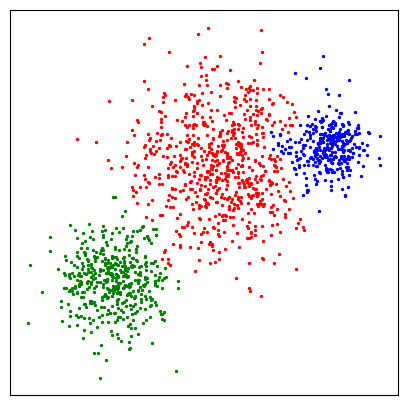

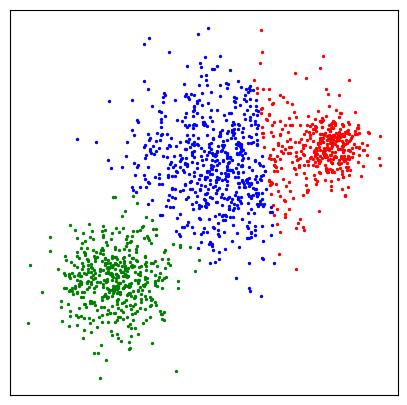

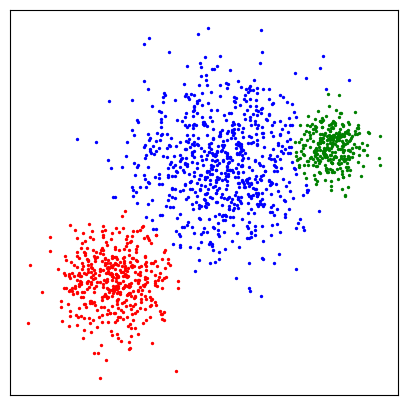

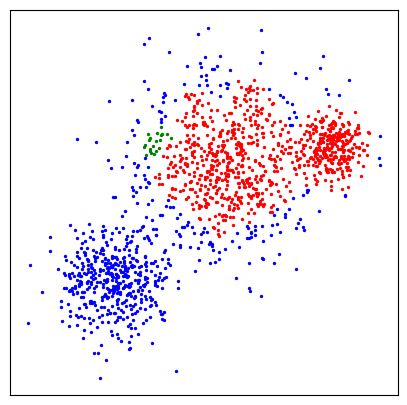

In [11]:
# dataset3
######
model31 = AgglomerativeClustering(n_clusters=3,linkage='ward').fit(dataset3)
labels31 = model31.fit_predict(dataset3)
y311 = np.empty((0, 2))
y312 = np.empty((0, 2))
y313 = np.empty((0, 2))
for i in range(n_samples):
    if labels31[i] == 0:
        y311 = np.r_[y311, dataset3[i].reshape((1, 2))]
    elif labels31[i] == 1:
        y312 = np.r_[y312, dataset3[i].reshape((1, 2))]
    else:
        y313 = np.r_[y313, dataset3[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(y311[:,0],y311[:,1],color="red",s = 2)
plt.scatter(y312[:,0],y312[:,1],color="green",s = 2)
plt.scatter(y313[:,0],y313[:,1],color="blue",s = 2)
######
model32 = KMeans(n_clusters=3).fit(dataset3)
labels32 = model32.fit_predict(dataset3)
y321 = np.empty((0, 2))
y322 = np.empty((0, 2))
y323 = np.empty((0, 2))
for i in range(n_samples):
    if labels32[i] == 0:
        y321 = np.r_[y321, dataset3[i].reshape((1, 2))]
    elif labels32[i] == 1:
        y322 = np.r_[y322, dataset3[i].reshape((1, 2))]
    else:
        y323 = np.r_[y323, dataset3[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(y321[:,0],y321[:,1],color="red",s = 2)
plt.scatter(y322[:,0],y322[:,1],color="green",s = 2)
plt.scatter(y323[:,0],y323[:,1],color="blue",s = 2)
######
model33 = GaussianMixture(n_components=3).fit(dataset3)
labels33 = model33.fit_predict(dataset3)
y331 = np.empty((0, 2))
y332 = np.empty((0, 2))
y333 = np.empty((0, 2))
for i in range(n_samples):
    if labels33[i] == 0:
        y331 = np.r_[y331, dataset3[i].reshape((1, 2))]
    elif labels33[i] == 1:
        y332 = np.r_[y332, dataset3[i].reshape((1, 2))]
    else:
        y333 = np.r_[y333, dataset3[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(y331[:,0],y331[:,1],color="red",s = 2)
plt.scatter(y332[:,0],y332[:,1],color="green",s = 2)
plt.scatter(y333[:,0],y333[:,1],color="blue",s = 2)
######
model34 = DBSCAN(eps=0.15,min_samples=15).fit(dataset3)
labels34 = model34.fit_predict(dataset3)
y341 = np.empty((0, 2))
y342 = np.empty((0, 2))
y343 = np.empty((0, 2))
for i in range(n_samples):
    if labels34[i] == 0:
        y341 = np.r_[y341, dataset3[i].reshape((1, 2))]
    elif labels34[i] == 1:
        y342 = np.r_[y342, dataset3[i].reshape((1, 2))]
    else:
        y343 = np.r_[y343, dataset3[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(y341[:,0],y341[:,1],color="red",s = 2)
plt.scatter(y342[:,0],y342[:,1],color="green",s = 2)
plt.scatter(y343[:,0],y343[:,1],color="blue",s = 2)

数据集4

c:\learnAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\learnAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\learnAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\learnAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_

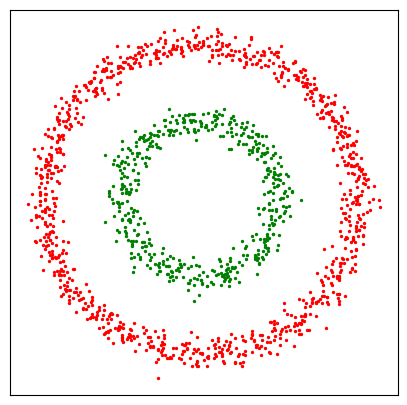

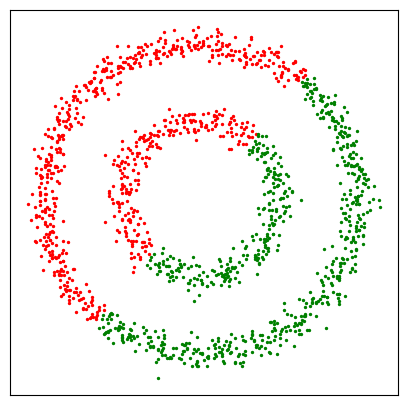

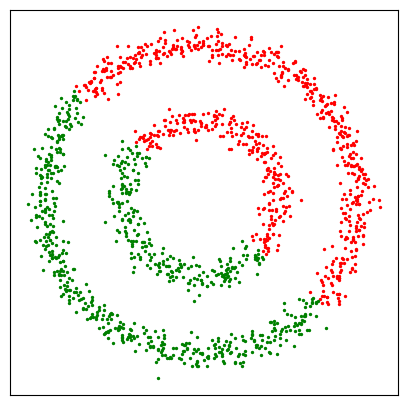

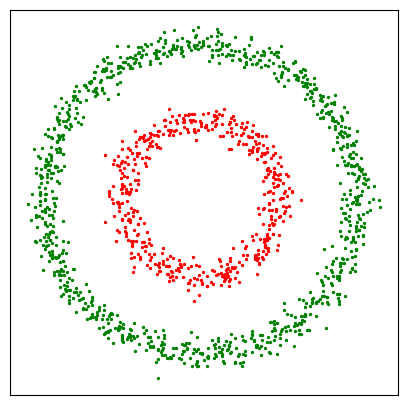

In [12]:
# dataset4
######
model41 = AgglomerativeClustering(n_clusters=2,linkage='single').fit(dataset4)
labels41 = model41.fit_predict(dataset4)
y411 = np.empty((0, 2))
y412 = np.empty((0, 2))
for i in range(n_samples):
    if labels41[i] == 0:
        y411 = np.r_[y411, dataset4[i].reshape((1, 2))]
    else:
        y412 = np.r_[y412, dataset4[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(y411[:,0],y411[:,1],color="red",s = 2)
plt.scatter(y412[:,0],y412[:,1],color="green",s = 2)
######
model42 = KMeans(n_clusters=2).fit(dataset4)
labels42 = model42.fit_predict(dataset4)
y421 = np.empty((0, 2))
y422 = np.empty((0, 2))
for i in range(n_samples):
    if labels42[i] == 0:
        y421 = np.r_[y421, dataset4[i].reshape((1, 2))]
    else:
        y422 = np.r_[y422, dataset4[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(y421[:,0],y421[:,1],color="red",s = 2)
plt.scatter(y422[:,0],y422[:,1],color="green",s = 2)
######
model43 = GaussianMixture(n_components=2).fit(dataset4)
labels43 = model43.fit_predict(dataset4)
y431 = np.empty((0, 2))
y432 = np.empty((0, 2))
for i in range(n_samples):
    if labels43[i] == 0:
        y431 = np.r_[y431, dataset4[i].reshape((1, 2))]
    else:
        y432 = np.r_[y432, dataset4[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(y431[:,0],y431[:,1],color="red",s = 2)
plt.scatter(y432[:,0],y432[:,1],color="green",s = 2)
######
model44 = DBSCAN(eps=0.2).fit(dataset4)
labels44 = model44.fit_predict(dataset4)
y441 = np.empty((0, 2))
y442 = np.empty((0, 2))
for i in range(n_samples):
    if labels44[i] == 0:
        y441 = np.r_[y441, dataset4[i].reshape((1, 2))]
    else:
        y442 = np.r_[y442, dataset4[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(y441[:,0],y441[:,1],color="red",s = 2)
plt.scatter(y442[:,0],y442[:,1],color="green",s = 2)

数据集5

c:\learnAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\learnAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\learnAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\learnAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_

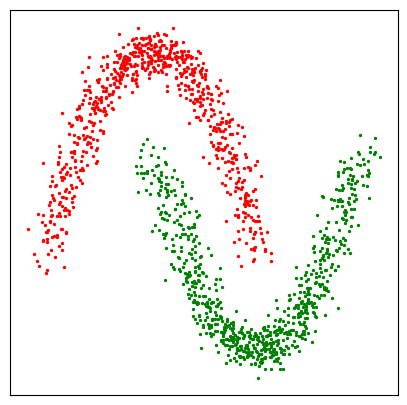

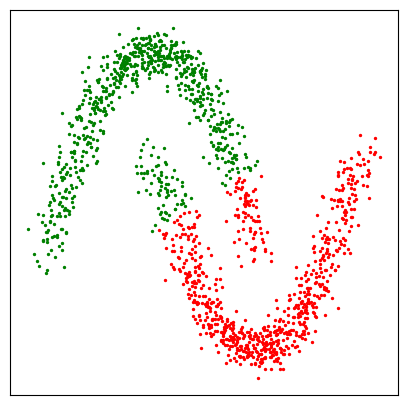

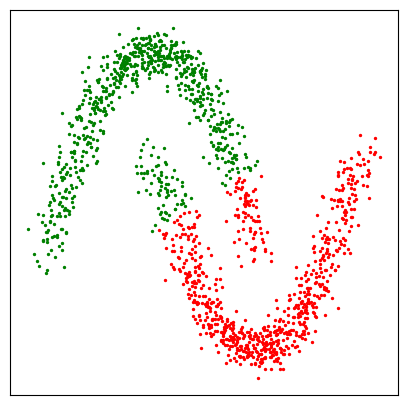

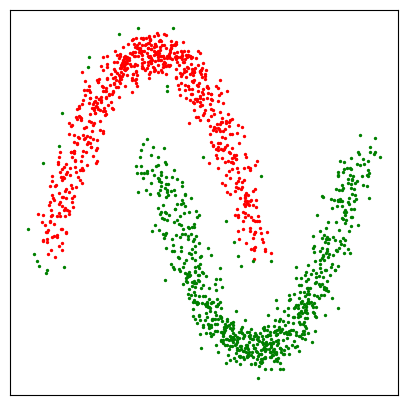

In [13]:
# dataset5
######
model51 = AgglomerativeClustering(n_clusters=2,linkage='single').fit(dataset5)
labels51 = model51.fit_predict(dataset5)
y511 = np.empty((0, 2))
y512 = np.empty((0, 2))
for i in range(n_samples):
    if labels51[i] == 0:
        y511 = np.r_[y511, dataset5[i].reshape((1, 2))]
    else:
        y512 = np.r_[y512, dataset5[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(y511[:,0],y511[:,1],color="red",s = 2)
plt.scatter(y512[:,0],y512[:,1],color="green",s = 2)
######
model52 = KMeans(n_clusters=2).fit(dataset5)
labels52 = model52.fit_predict(dataset5)
y521 = np.empty((0, 2))
y522 = np.empty((0, 2))
for i in range(n_samples):
    if labels52[i] == 0:
        y521 = np.r_[y521, dataset5[i].reshape((1, 2))]
    else:
        y522 = np.r_[y522, dataset5[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(y521[:,0],y521[:,1],color="red",s = 2)
plt.scatter(y522[:,0],y522[:,1],color="green",s = 2)
######
model53 = GaussianMixture(n_components=2,covariance_type='spherical').fit(dataset5)
labels53 = model53.fit_predict(dataset5)
y531 = np.empty((0, 2))
y532 = np.empty((0, 2))
for i in range(n_samples):
    if labels53[i] == 0:
        y531 = np.r_[y531, dataset5[i].reshape((1, 2))]
    else:
        y532 = np.r_[y532, dataset5[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(y531[:,0],y531[:,1],color="red",s = 2)
plt.scatter(y532[:,0],y532[:,1],color="green",s = 2)
######
model54 = DBSCAN(min_samples=5,eps=0.1).fit(dataset5)
labels54 = model54.fit_predict(dataset5)
y541 = np.empty((0, 2))
y542 = np.empty((0, 2))
for i in range(n_samples):
    if labels54[i] == 0:
        y541 = np.r_[y541, dataset5[i].reshape((1, 2))]
    else:
        y542 = np.r_[y542, dataset5[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(y541[:,0],y541[:,1],color="red",s = 2)
plt.scatter(y542[:,0],y542[:,1],color="green",s = 2)

数据集6

c:\learnAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\learnAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\learnAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\learnAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_

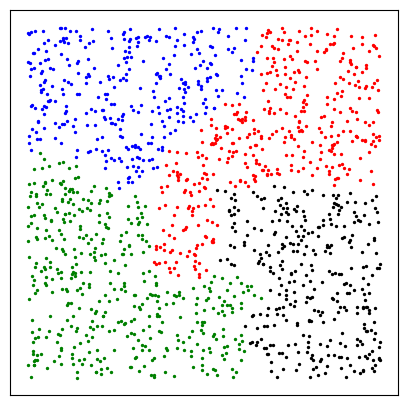

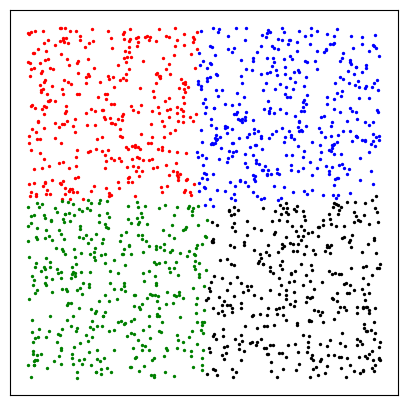

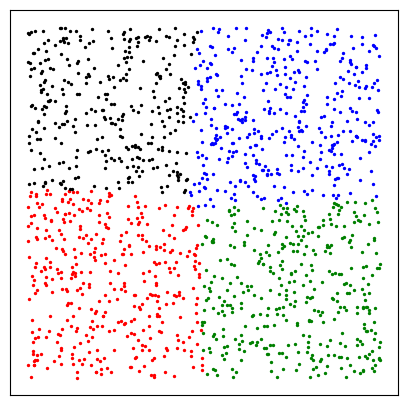

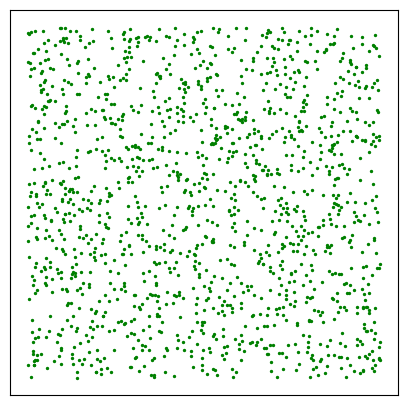

In [14]:
# dataset6
######
model61 = AgglomerativeClustering(n_clusters=4).fit(dataset6)
labels61 = model61.fit_predict(dataset6)
y611 = np.empty((0, 2))
y612 = np.empty((0, 2))
y613 = np.empty((0, 2))
y614 = np.empty((0, 2))

for i in range(n_samples):
    if labels61[i] == 0:
        y611 = np.r_[y611, dataset6[i].reshape((1, 2))]
    elif labels61[i] == 1:
        y612 = np.r_[y612, dataset6[i].reshape((1, 2))]
    elif labels61[i] == 2:
        y613 = np.r_[y613, dataset6[i].reshape((1, 2))]
    else:
        y614 = np.r_[y614, dataset6[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(y611[:,0],y611[:,1],color="red",s = 2)
plt.scatter(y612[:,0],y612[:,1],color="green",s = 2)
plt.scatter(y613[:,0],y613[:,1],color="blue",s = 2)
plt.scatter(y614[:,0],y614[:,1],color="black",s = 2)
######
model62 = KMeans(n_clusters=4).fit(dataset6)
labels62 = model62.fit_predict(dataset6)
y621 = np.empty((0, 2))
y622 = np.empty((0, 2))
y623 = np.empty((0, 2))
y624 = np.empty((0, 2))
for i in range(n_samples):
    if labels62[i] == 0:
        y621 = np.r_[y621, dataset6[i].reshape((1, 2))]
    elif labels62[i] == 1:
        y622 = np.r_[y622, dataset6[i].reshape((1, 2))]
    elif labels62[i] == 2:
        y623 = np.r_[y623, dataset6[i].reshape((1, 2))]
    else:
        y624 = np.r_[y624, dataset6[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(y621[:,0],y621[:,1],color="red",s = 2)
plt.scatter(y622[:,0],y622[:,1],color="green",s = 2)
plt.scatter(y623[:,0],y623[:,1],color="blue",s = 2)
plt.scatter(y624[:,0],y624[:,1],color="black",s = 2)
######
model63 = GaussianMixture(n_components=4).fit(dataset6)
labels63 = model63.fit_predict(dataset6)
y631 = np.empty((0, 2))
y632 = np.empty((0, 2))
y633 = np.empty((0, 2))
y634 = np.empty((0, 2))

for i in range(n_samples):
    if labels63[i] == 0:
        y631 = np.r_[y631, dataset6[i].reshape((1, 2))]
    elif labels63[i] == 1:
        y632 = np.r_[y632, dataset6[i].reshape((1, 2))]
    elif labels63[i] == 2:
        y633 = np.r_[y633, dataset6[i].reshape((1, 2))]
    else:
        y634 = np.r_[y634, dataset6[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(y631[:,0],y631[:,1],color="red",s = 2)
plt.scatter(y632[:,0],y632[:,1],color="green",s = 2)
plt.scatter(y633[:,0],y633[:,1],color="blue",s = 2)
plt.scatter(y634[:,0],y634[:,1],color="black",s = 2)
######
model64 = DBSCAN(eps=0.3,min_samples=25).fit(dataset6)
labels64 = model64.fit_predict(dataset6)
y641 = np.empty((0, 2))
y642 = np.empty((0, 2))
y643 = np.empty((0, 2))
y644 = np.empty((0, 2))
for i in range(n_samples):
    if labels64[i] == 0:
        y641 = np.r_[y641, dataset6[i].reshape((1, 2))]
    elif labels64[i] == 1:
        y642 = np.r_[y642, dataset6[i].reshape((1, 2))]
    elif labels64[i] == 2:
        y643 = np.r_[y643, dataset6[i].reshape((1, 2))]
    else:
        y644 = np.r_[y644, dataset6[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(y641[:,0],y641[:,1],color="green",s = 2)
plt.scatter(y642[:,0],y642[:,1],color="red",s = 2)
plt.scatter(y643[:,0],y643[:,1],color="blue",s = 2)
plt.scatter(y644[:,0],y644[:,1],color="black",s = 2)

4. 在不同数据集上，分别使用外部聚类有效性和内部聚类有效性的度量方法来比较不同聚类方法。请写明具体的外（内）部聚类有效性的度量方法，并将计算结果请填入下表（结论保留小数点后4位有效数字）。

<table width = c(100,500,500), center = True>
    <tr>
        <td> 方法                  </td>
        <td> 外部有效性                 </td>
        <td> 内部有效性                 </td>
    </tr>
    <tr>
        <td> 层次聚类                 </td>
        <td>                  </td>
        <td>                  </td>
    </tr>
      <tr>
        <td> Kmean                 </td>
        <td>                  </td>
        <td>                  </td>
    </tr>
      <tr>
        <td> GMM                 </td>
        <td>                  </td>
        <td>                  </td>
    </tr>
      <tr>
        <td> DBSCAN                 </td>
        <td>                  </td>
        <td>                  </td>
    </tr>
</table>

外部有效性我使用纯度作为评价指标，内部有效性我使用的是决定系数作为评价指标。

In [15]:
import pandas as pd
def cal_purity(pred, real):
    n_sample = len(pred)
    data = pd.DataFrame(columns=['pred', 'real'])
    data['pred'] = pred
    data['real'] = real
    purity = 0.0
    for idx, group in list(data.groupby('pred')['real']):
        group_ratio = len(group) / n_sample
        group_purity = max(group.value_counts()) / len(group)
        purity += group_ratio * group_purity
    return purity

def cal_r_squared(pred, feature):
    n_sample = len(pred)
    data = pd.DataFrame(columns=['pred', 'x1', 'x2'])
    data['pred'] = pred
    data[['x1', 'x2']] = feature
    total = (data[['x1', 'x2']].var() * n_sample).sum()
    error = 0.0
    for idx, group in list(data.groupby('pred')[['x1', 'x2']]):
        group_size = len(group)
        error += (group.var() * group_size).sum()
    regression = total - error
    return regression / total

In [16]:
n_subset = int(n_samples/3)
label1 = np.hstack([
    np.full(n_subset, 0),
    np.full(n_subset, 1),
    np.full(n_subset, 2)
])

n_subset = int(n_samples/3)
label2 = np.hstack([
    np.full(n_subset, 0),
    np.full(n_subset, 1),
    np.full(n_subset, 2)
])

sigma = 0.1
sigma1 = 2*sigma
sigma2 = 5*sigma
sigma3 = 3*sigma
n_subset1 = int(sigma1/(sigma1+sigma2+sigma3)*n_samples)
n_subset2 = int(sigma2/(sigma1+sigma2+sigma3)*n_samples)
n_subset3 = int(sigma3/(sigma1+sigma2+sigma3)*n_samples)
label3 = np.hstack([
    np.full(n_subset1, 0),
    np.full(n_subset2, 1),
    np.full(n_subset3, 2)
]) 

n_subset1 = int(n_samples/3)
n_subset2 = int(n_samples/3*2)
label4 = np.hstack([
    np.full(n_subset1, 0),
    np.full(n_subset2, 1)
])

n_subset=int(n_samples/2)
label5 = np.hstack([
    np.full(n_subset, 0),
    np.full(n_subset, 1)
])

n_subset=int(n_samples/4)
label6 = np.hstack([
    np.full(n_subset, 0),
    np.full(n_subset, 1),
    np.full(n_subset, 2),
    np.full(n_subset, 3)
])

外部有效性

In [17]:
#dataset1
print(round(cal_purity(labels11, label1),4))
print(round(cal_purity(labels12, label1),4))
print(round(cal_purity(labels13, label1),4))
print(round(cal_purity(labels14, label1),4))

1.0
1.0
1.0
1.0


In [18]:
#dataset2
print(round(cal_purity(labels21, label2),4))
print(round(cal_purity(labels22, label2),4))
print(round(cal_purity(labels23, label2),4))
print(round(cal_purity(labels24, label2),4))

0.6847
0.6767
0.9907
0.9253


In [19]:
#dataset3
print(round(cal_purity(labels31, label3),4))
print(round(cal_purity(labels32, label3),4))
print(round(cal_purity(labels33, label3),4))
print(round(cal_purity(labels34, label3),4))

0.9627
0.906
0.9767
0.7673


In [20]:
#dataset4
print(round(cal_purity(labels41, label4),4))
print(round(cal_purity(labels42, label4),4))
print(round(cal_purity(labels43, label4),4))
print(round(cal_purity(labels44, label4),4))

1.0
0.6667
0.6667
1.0


In [21]:
#dataset5
print(round(cal_purity(labels51, label5),4))
print(round(cal_purity(labels52, label5),4))
print(round(cal_purity(labels53, label5),4))
print(round(cal_purity(labels54, label5),4))

1.0
0.8987
0.8987
0.9887


In [22]:
#dataset6
print(round(cal_purity(labels61, label6),4))
print(round(cal_purity(labels62, label6),4))
print(round(cal_purity(labels63, label6),4))
print(round(cal_purity(labels64, label6),4))

0.8233
0.9767
0.9553
0.25


内部有效性

In [23]:
#dataset1
print(round(cal_r_squared(labels11, dataset1),4))
print(round(cal_r_squared(labels12, dataset1),4))
print(round(cal_r_squared(labels13, dataset1),4))
print(round(cal_r_squared(labels14, dataset1),4))

0.9378
0.9378
0.9378
0.9382


In [24]:
#dataset2
print(round(cal_r_squared(labels21, dataset2),4))
print(round(cal_r_squared(labels22, dataset2),4))
print(round(cal_r_squared(labels23, dataset2),4))
print(round(cal_r_squared(labels24, dataset2),4))

0.8122
0.8354
0.737
0.6572


In [25]:
#dataset3
print(round(cal_r_squared(labels31, dataset3),4))
print(round(cal_r_squared(labels32, dataset3),4))
print(round(cal_r_squared(labels33, dataset3),4))
print(round(cal_r_squared(labels34, dataset3),4))

0.7978
0.8103
0.7897
0.6123


In [26]:
#dataset4
print(round(cal_r_squared(labels41, dataset4),4))
print(round(cal_r_squared(labels42, dataset4),4))
print(round(cal_r_squared(labels43, dataset4),4))
print(round(cal_r_squared(labels44, dataset4),4))

-0.0004
0.3751
0.3748
0.0009


In [27]:
#dataset5
print(round(cal_r_squared(labels51, dataset5),4))
print(round(cal_r_squared(labels52, dataset5),4))
print(round(cal_r_squared(labels53, dataset5),4))
print(round(cal_r_squared(labels54, dataset5),4))

0.5571
0.643
0.643
0.5583


In [28]:
#dataset6
print(round(cal_r_squared(labels61, dataset6),4))
print(round(cal_r_squared(labels62, dataset6),4))
print(round(cal_r_squared(labels63, dataset6),4))
print(round(cal_r_squared(labels64, dataset6),4))

0.6908
0.7488
0.748
0.0


依次将上述数据填表

dataset1 

<table width = c(100,500,500), center = True>
    <tr>
        <td> 方法                  </td>
        <td> 外部有效性                 </td>
        <td> 内部有效性                 </td>
    </tr>
    <tr>
        <td> 层次聚类                 </td>
        <td>   1.0               </td>
        <td>   0.9378              </td>
    </tr>
      <tr>
        <td> Kmean                 </td>
        <td>   1.0               </td>
        <td>   0.9378              </td>
    </tr>
      <tr>
        <td> GMM                 </td>
        <td>   1.0               </td>
        <td>   0.9378              </td>
    </tr>
      <tr>
        <td> DBSCAN                 </td>
        <td>  1.0                </td>
        <td>   0.9382              </td>
    </tr>
</table>



dataset2

<table width = c(100,500,500), center = True>
    <tr>
        <td> 方法                  </td>
        <td> 外部有效性                 </td>
        <td> 内部有效性                 </td>
    </tr>
    <tr>
        <td> 层次聚类                 </td>
        <td>   0.6847               </td>
        <td>   0.8122              </td>
    </tr>
      <tr>
        <td> Kmean                 </td>
        <td>   0.6767              </td>
        <td>   0.8354               </td>
    </tr>
      <tr>
        <td> GMM                 </td>
        <td>   0.9907              </td>
        <td>   0.7370               </td>
    </tr>
      <tr>
        <td> DBSCAN                 </td>
        <td>  0.9253                </td>
        <td>   0.6572               </td>
    </tr>
</table>



dataset3

<table width = c(100,500,500), center = True>
    <tr>
        <td> 方法                  </td>
        <td> 外部有效性                 </td>
        <td> 内部有效性                 </td>
    </tr>
    <tr>
        <td> 层次聚类                 </td>
        <td>   0.9627               </td>
        <td>   0.7978               </td>
    </tr>
      <tr>
        <td> Kmean                 </td>
        <td>   0.9060               </td>
        <td>   0.8103               </td>
    </tr>
      <tr>
        <td> GMM                 </td>
        <td>   0.9767               </td>
        <td>   0.7897               </td>
    </tr>
      <tr>
        <td> DBSCAN                 </td>
        <td>  0.7673                </td>
        <td>   0.6123               </td>
    </tr>
</table>



dataset4

<table width = c(100,500,500), center = True>
    <tr>
        <td> 方法                  </td>
        <td> 外部有效性                 </td>
        <td> 内部有效性                 </td>
    </tr>
    <tr>
        <td> 层次聚类                 </td>
        <td>   1.0               </td>
        <td>   0               </td>
    </tr>
      <tr>
        <td> Kmean                 </td>
        <td>   0.667               </td>
        <td>   0.3751               </td>
    </tr>
      <tr>
        <td> GMM                 </td>
        <td>   0.667               </td>
        <td>   0.3748              </td>
    </tr>
      <tr>
        <td> DBSCAN                 </td>
        <td>  1.0                </td>
        <td>   0.0009               </td>
    </tr>
</table>



dataset5

<table width = c(100,500,500), center = True>
    <tr>
        <td> 方法                  </td>
        <td> 外部有效性                 </td>
        <td> 内部有效性                 </td>
    </tr>
    <tr>
        <td> 层次聚类                 </td>
        <td>   1.0               </td>
        <td>   0.5571              </td>
    </tr>
      <tr>
        <td> Kmean                 </td>
        <td>   0.8987               </td>
        <td>   0.643               </td>
    </tr>
      <tr>
        <td> GMM                 </td>
        <td>   0.8987               </td>
        <td>   0.643               </td>
    </tr>
      <tr>
        <td> DBSCAN                 </td>
        <td>  0.9887                </td>
        <td>   0.5583              </td>
    </tr>
</table>



dataset6

<table width = c(100,500,500), center = True>
    <tr>
        <td> 方法                  </td>
        <td> 外部有效性                 </td>
        <td> 内部有效性                 </td>
    </tr>
    <tr>
        <td> 层次聚类                 </td>
        <td>   0.8233               </td>
        <td>   0.6908               </td>
    </tr>
      <tr>
        <td> Kmean                 </td>
        <td>   0.9767               </td>
        <td>   0.7488               </td>
    </tr>
      <tr>
        <td> GMM                 </td>
        <td>   0.9553               </td>
        <td>   0.7480               </td>
    </tr>
      <tr>
        <td> DBSCAN                 </td>
        <td>  0.25                </td>
        <td>   0              </td>
    </tr>
</table>



5. 通过本次实验，评述各类聚类方法的使用范围。

dataset1中同类的点距离很近但是不同类的点距离很远，所有的聚类算法效果都很好。但是在dataset2-6中,数据集都有存在不同类的点距离较近甚至相互交错之现象，因此我们要想探讨四种聚类算法的使用范围，主要应该针对后5种数据集。

1. 层次聚类

层次聚类思想是把所有的样本点归为一类，再不断把距离最近的两类合并为一类。层次聚类在6个数据集中的纯度都比较高，它对距离度量的选择并不敏感，适用范围比较广。但是如果像dataset2、dataset6那样存在一定数量的异常点或簇之间界限比较模糊的情况，它的效果并不是那么理想。


2. Kmeans

Kmeans聚类的思想是根据输入的聚类数先随机确定相应的中心点，根据其它点与这些中心点之间的距离对所有样本点进行粗分类，再根据分类结果重新确定中心点并重新分类，依此类推直到满足收敛条件为止（比如分类结果不再改变）。由于每次都要计算所有的样本与每一个质心之间的相似度，故在大规模的数据集上，KMeans算法的收敛速度比较慢。而且Kmeans的效果比较依赖初始中心点的选取，比如说对于dataset4,dataset5这样的情况，如果一开始两个中心点都取在同一个圆或波浪上，聚类结果的准确性就大打折扣了。在我来看，Kmeans应该更适合组内距离较小的数据集。

3. GMM

GMM的思想是通过判断样本点来自哪个正态分布总体来判断样本点属于哪一类。当聚类问题中各类别的尺寸不同、聚类间有相关关系的时候，往往使用GMM更合适，比如我们可以看到dataset2中GMM的效果就很好（前提是设置了较好的参数）。


4. DBSCAN

DBSCAN是一种基于密度的聚类算法，它的思想是某点必须属于某中心点的邻域才能和这个中心点被归为一类。在dataset2,4,5这样数据在一开始有较明显分割特征的数据集效果还可以，但在dataset6中，每个点之间的距离都差不多，就会被直接归为一类。所以从这个角度来说，DBSCAN在组间距离较大时效果才能保证。而且，若一个点不在任何一个中心点的邻域中就会被当作噪声而不被归为任何一类，这样虽然更加适合有噪声点和离群点时的聚类工作，但是不太适合稀疏数据集。使用DBSCAN之前，我们还需要清楚数据集内点与点的距离和样本量以此来估计邻域半径和minpts这样的参数，否则会对效果产生明显的影响，这里就需要调参了:)

6. （选做）复现层次聚类、Kmeans、GMM、DBSCAN的代码。复现指的是通过理解原始代码的逻辑和功能，重新编写出一个具有相同功能的代码，只能使用最基础的包，如numpy、math等。

层次聚类

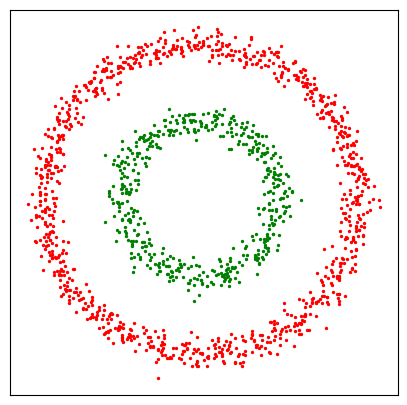

In [29]:
#使用已有包的效果回顾 dataset4
fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(y411[:,0],y411[:,1],color="red",s = 2)
plt.scatter(y412[:,0],y412[:,1],color="green",s = 2)

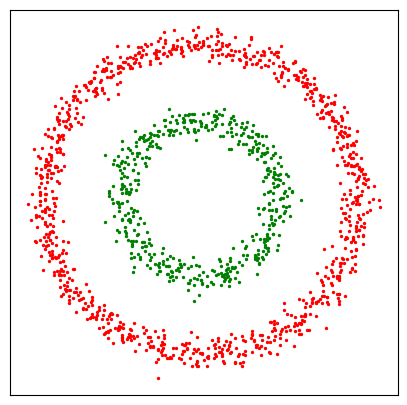

In [30]:
#手动实现的效果 dataset4
class AgglomerativeClustering1:
    def __init__(self, k):
        self.k = k
        self.labels = None
    
    def fit(self, dataset):
        self.dataset = dataset
        n = len(self.dataset)
        clusters = [[i] for i in range(n)]
        # 初始化点之间的距离
        distance = np.zeros((n, n))
        for i in range(n):
            for j in range(i + 1, n):
                distance[i, j] = np.sqrt(np.sum((self.dataset[[i]][:, np.newaxis] - self.dataset[[j]])** 2, axis=2))
                distance[j, i] = distance[i, j]
        np.fill_diagonal(distance, np.inf)
        while len(clusters) > self.k:
            merge_indices = np.unravel_index(np.argmin(distance), distance.shape) # 最小距离的index拿来合并
            distance[merge_indices[0], :] = np.minimum(
                distance[merge_indices[0], :],
                distance[merge_indices[1], :]
            )
            distance[:, merge_indices[0]] = distance[merge_indices[0], :]
            distance = np.delete(distance, merge_indices[1], axis=0)
            distance = np.delete(distance, merge_indices[1], axis=1)
            np.fill_diagonal(distance, np.inf)
            clusters[merge_indices[0]].extend(clusters[merge_indices[1]])
            del clusters[merge_indices[1]]

        self.labels = np.zeros(len(self.dataset), dtype=int)
        for i, cluster in enumerate(clusters):
            self.labels[cluster] = i
        return self.labels

labels45 = AgglomerativeClustering1(k=2).fit(dataset4)
y451 = np.empty((0, 2))
y452 = np.empty((0, 2))
for i in range(n_samples):
    if labels45[i] == 0:
        y451 = np.r_[y451, dataset4[i].reshape((1, 2))]
    else:
        y452 = np.r_[y452, dataset4[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(y451[:,0],y451[:,1],color="green",s = 2)
plt.scatter(y452[:,0],y452[:,1],color="red",s = 2)

Kmeans

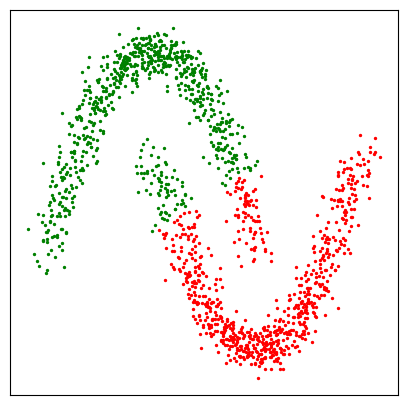

In [31]:
#使用已有包的效果回顾 dataset5
fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(y521[:,0],y521[:,1],color="red",s = 2)
plt.scatter(y522[:,0],y522[:,1],color="green",s = 2)

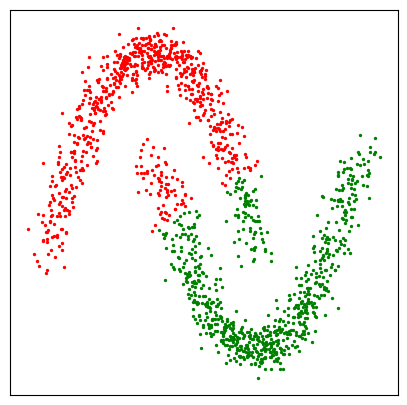

In [32]:
#手动实现的效果 dataset5
class Kmeans1:
    def __init__(self, k, max_iters=6666, eps=1e-5):
        self.k = k
        self.max_iters = max_iters
        self.eps = eps
        self.labels = None
        
    def fit(self, dataset):
        # 随机选中心
        center = dataset[np.random.choice(dataset.shape[0], self.k, replace=False)]
        for i in range(self.max_iters):
            distances = np.linalg.norm(dataset[:, np.newaxis, :] - center, axis=2)
            self.labels = np.argmin(distances, axis=1)
            newcenter = np.array([dataset[self.labels == i].mean(axis=0) for i in range(self.k)])
            if np.linalg.norm(newcenter - center) < self.eps: # 判断收敛
                break
            center = newcenter
        return self.labels
    
labels55 = Kmeans1(k=2).fit(dataset5)
y551 = np.empty((0, 2))
y552 = np.empty((0, 2))
for i in range(n_samples):
    if labels55[i] == 0:
        y551 = np.r_[y551, dataset5[i].reshape((1, 2))]
    else:
        y552 = np.r_[y552, dataset5[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(y551[:,0],y551[:,1],color="red",s = 2)
plt.scatter(y552[:,0],y552[:,1],color="green",s = 2)

DBSCAN

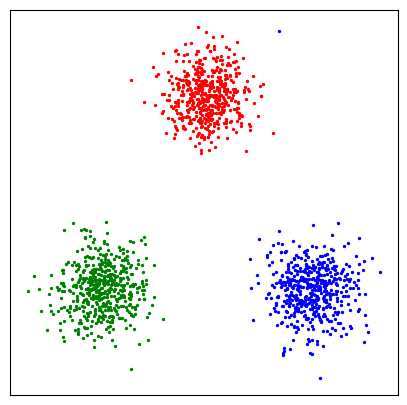

In [33]:
#使用已有包的效果回顾 dataset1
fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(y141[:,0],y141[:,1],color="red",s = 2)
plt.scatter(y142[:,0],y142[:,1],color="green",s = 2)
plt.scatter(y143[:,0],y143[:,1],color="blue",s = 2)

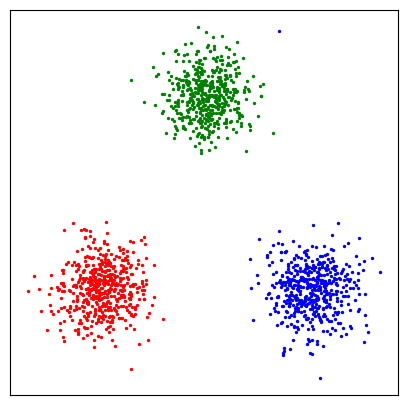

In [35]:
#手动实现的效果 dataset1
class DBSCAN1:
    def __init__(self, eps=0.5, min_samples=50):
        self.eps = eps
        self.min_samples = min_samples
        self.labels = None

    def region_query(self, dataset, center_index):
        center_point = dataset[center_index]
        neighbors = []
        for i in range(len(dataset)):
            if np.linalg.norm(dataset[i] - center_point) < self.eps:
                neighbors.append(i)
        return neighbors

    def expand_cluster(self, dataset, center_index, neighbors, cluster_label):
        self.labels[center_index] = cluster_label
        i = 0
        while i < len(neighbors):
            neighbor_index = neighbors[i]

            if self.labels[neighbor_index] == -1:
                self.labels[neighbor_index] = cluster_label
            elif self.labels[neighbor_index] == 0:
                self.labels[neighbor_index] = cluster_label
                new_neighbors = self.region_query(dataset, neighbor_index)

                if len(new_neighbors) >= self.min_samples:
                    neighbors += new_neighbors

            i += 1

    def fit(self, dataset):
        self.labels = np.zeros(len(dataset), dtype=int)
        cluster_label = 0

        for i in range(len(dataset)):
            if self.labels[i] != 0:
                continue

            neighbors = self.region_query(dataset, i)

            if len(neighbors) < self.min_samples:
                self.labels[i] = -1  # Mark as noise
            else:
                cluster_label += 1
                self.expand_cluster(dataset, i, neighbors, cluster_label)
        
        return self.labels


labels15 = DBSCAN1().fit(dataset1)
y151 = np.empty((0, 2))
y152 = np.empty((0, 2))
y153 = np.empty((0, 2))
for i in range(n_samples):
    if labels15[i] == 2:
        y151 = np.r_[y151, dataset1[i].reshape((1, 2))]
    elif labels15[i] == 1:
        y152 = np.r_[y152, dataset1[i].reshape((1, 2))]
    else:
        y153 = np.r_[y153, dataset1[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(y151[:,0],y151[:,1],color="red",s = 2)
plt.scatter(y152[:,0],y152[:,1],color="green",s = 2)
plt.scatter(y153[:,0],y153[:,1],color="blue",s = 2)

GMM

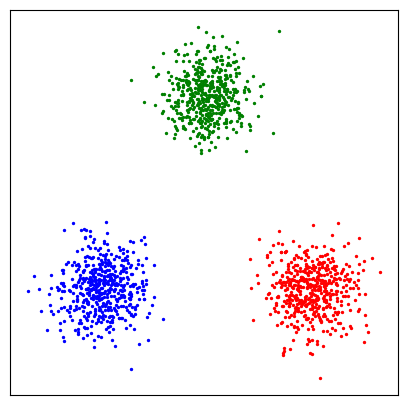

In [37]:
#使用已有包的效果回顾 dataset1
fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(y131[:,0],y131[:,1],color="red",s = 2)
plt.scatter(y132[:,0],y132[:,1],color="green",s = 2)
plt.scatter(y133[:,0],y133[:,1],color="blue",s = 2)

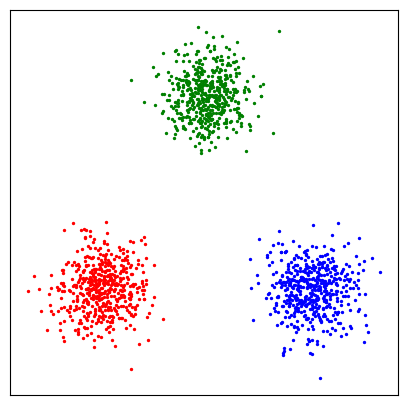

In [51]:
#手动实现的效果 dataset1
from scipy.stats import multivariate_normal

class GaussianMixture1:
    def __init__(self, k, max_iterations=6666, eps=1e-6, covariance_type='full'):
        self.k = k
        self.max_iterations = max_iterations
        self.eps = eps
        self.covariance_type = covariance_type


    def fit(self, dataset):    
        self.num_samples, self.num_features = dataset.shape
        self.means = dataset[np.random.choice(self.num_samples, self.k, replace=False)]
        if self.covariance_type == 'full':
            self.covariances = [np.eye(self.num_features) for _ in range(self.k)]
        elif self.covariance_type == 'tied':
            self.covariances = np.eye(self.num_features)
        else:
            raise ValueError("Invalid covariance_type. Supported types are 'full' and 'tied'.")
        
        self.weights = np.ones(self.k) / self.k
    
        for iteration in range(self.max_iterations):
            # E steps
            posteriors = np.zeros((self.num_samples, self.k))
            for i in range(self.k):
                multivariate = multivariate_normal(mean=self.means[i], cov=self.covariances[i])
                posteriors[:, i] = self.weights[i] * multivariate.pdf(dataset)
            posteriors = posteriors / np.sum(posteriors, axis=1, keepdims=True)
            
            # M steps
            means = np.dot(posteriors.T, dataset) / np.sum(posteriors, axis=0, keepdims=True).T
            covariances = np.zeros((self.k, self.num_features, self.num_features))
            self.new_weights = np.sum(posteriors, axis=0) / self.num_samples
            for i in range(self.k):
                diff = dataset - means[i]
                covariances[i] = np.dot(posteriors[:, i] * diff.T, diff) / np.sum(posteriors[:, i])

            if np.linalg.norm(self.new_weights - self.weights) < self.eps:
                break
            self.weights = self.new_weights

        labels = np.argmax(posteriors, axis=1)
        return labels


labels16 = GaussianMixture1(k=3).fit(dataset1)
y161 = np.empty((0, 2))
y162 = np.empty((0, 2))
y163 = np.empty((0, 2))
for i in range(n_samples):
    if labels16[i] == 0:
        y161 = np.r_[y161, dataset1[i].reshape((1, 2))]
    elif labels16[i] == 1:
        y162 = np.r_[y162, dataset1[i].reshape((1, 2))]
    else:
        y163 = np.r_[y163, dataset1[i].reshape((1, 2))]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(y161[:,0],y161[:,1],color="red",s = 2)
plt.scatter(y162[:,0],y162[:,1],color="green",s = 2)
plt.scatter(y163[:,0],y163[:,1],color="blue",s = 2)